# <u>PROJET 4</u>


## 1 - Introduction

### 1.1 Importation des librairies

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Importation des fichiers CSV

In [105]:
sousnut = pd.read_csv('sous_nutrition.csv')
dispo = pd.read_csv('dispo_alimentaire.csv')
populations = pd.read_csv('population.csv')
aides = pd.read_csv('aide_alimentaire.csv')

## 1.3  Dataframe "sousnut"

### 1.3.1 Consultation des données de sousnut

#### Je regarde le contenu global du dataframe et ses séries

In [106]:
sousnut.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


#### Je consulte le type de données qui compose le dataframe

In [107]:
sousnut.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

#### Les données composant les séries du dataframe sont  en totalité de type "object", du fait de leur mixité.
#### Il me faudra donc modifier ces dernières ultérieurement

### 1.3.2 Renommage des séries

#### Je renomme les séries des dataframes afin de leur donner une omogénéité pour leur utilisation à venir

In [108]:
sousnut.rename(
    columns   = {
        "Zone"  : "pays",
        "Année" : "année",
        "Valeur": "population"
        },
    inplace = True
)
# Vérification de la bonne exécution du renommage des séries du dataframe "sousnut".

sousnut.head()

,pays,année,population
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


### 1.3.3 Modification des valeurs de la série "année" depuis le format de période "xxxx-xxxx" au format année "xxxx"

In [109]:
# Création de la fonction "année_format" qui définira la valeur de chaque année voulue en fonction des valeurs rencontrées 
# et désignées

def année_format(année_code):
    if année_code == "2012-2014":
        return 2013
    
    elif année_code == "2013-2015":
        return 2014
    
    elif année_code == "2014-2016":
        return 2015
    
    elif année_code == "2015-2017":
        return 2016
    
    elif année_code == "2016-2018":
        return 2017
    
    elif année_code == "2017-2019":
        return 2018

# Application de la fonction "année_format" par ligne avec .apply

sousnut["année"] = sousnut["année"].apply(année_format)


##### vérification du bon fonctionnement de la fonction "année_format"

In [110]:
sousnut.head()

,pays,année,population
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


#### 1.3.4 Modification des types de données

##### 1.3.4.1 Remplacement des valeurs "<0.1" par 0.05 pour passage de la série "population" en type "float"

In [8]:
sousnut["population"]= sousnut["population"].str.replace("<0.1","0.05",regex=True)


#### 1.3.4.2 Remplacement des valeurs manquantes par la valeur 0.0

In [9]:
sousnut.fillna(0.0, inplace=True)

In [10]:
sousnut.info

<bound method DataFrame.info of              pays  année population
0     Afghanistan   2013        8.6
1     Afghanistan   2014        8.8
2     Afghanistan   2015        8.9
3     Afghanistan   2016        9.7
4     Afghanistan   2017       10.5
...           ...    ...        ...
1213     Zimbabwe   2014        0.0
1214     Zimbabwe   2015        0.0
1215     Zimbabwe   2016        0.0
1216     Zimbabwe   2017        0.0
1217     Zimbabwe   2018        0.0

[1218 rows x 3 columns]>

##### 1.3.4.3 modification des types de données pour les séries "année" et "population"

In [11]:
sousnut["année"] = sousnut.année.astype(int)
sousnut["population"] = sousnut.population.astype(float)

#### Vérification du changement de types de données

In [12]:
sousnut.dtypes

pays           object
année           int32
population    float64
dtype: object

##### 1.3.4.4 passage des valeurs de "population" en unités

In [13]:
sousnut["population"] =sousnut["population"]*1000000

# Appel du dataframe pour vérification du passage en unités de la série "population"
sousnut

,pays,année,population
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0
...,...,...,...
1213,Zimbabwe,2014,0.0
1214,Zimbabwe,2015,0.0
1215,Zimbabwe,2016,0.0
1216,Zimbabwe,2017,0.0


#### passage des valeurs de la série "population" au type "int"

In [14]:
sousnut["population"] = sousnut.population.astype(int)

#### Appel du dataframe pour vérification du passage de la série "population" au format "int"

In [15]:
sousnut

,pays,année,population
0,Afghanistan,2013,8600000
1,Afghanistan,2014,8800000
2,Afghanistan,2015,8900000
3,Afghanistan,2016,9700000
4,Afghanistan,2017,10500000
...,...,...,...
1213,Zimbabwe,2014,0
1214,Zimbabwe,2015,0
1215,Zimbabwe,2016,0
1216,Zimbabwe,2017,0


##### 1.3.4.5 Suppression des valeurs manquantes  NAN

In [16]:
sousnut.dropna(inplace = True)

#### 1.3.4.6 Vérification d'absence de valeur NULL

In [17]:
# J'appelle la somme du nombre de valeurs NULL  dans le dataframe "sousnut"
sousnut.isnull().sum()

pays          0
année         0
population    0
dtype: int64

#### 1.3.4.7 Passage de la série "pays" en caractères minuscules

In [18]:
sousnut["pays"] = sousnut["pays"].str.lower()

#### 1.3.4.8 suppression des parenthèses dans la série "pays"

In [19]:
sousnut["pays"] = sousnut["pays"].replace ("[()]"," ", regex=True)
sousnut["pays"] = sousnut["pays"].replace ("[-]"," ", regex=True)
sousnut["pays"] = sousnut["pays"].replace ("[,]"," ", regex=True)

#### 1.3.4.9 renommage de valeurs de la série "pays"

In [20]:
sousnut ["pays"]  = sousnut["pays"].str.replace("bolivie  état plurinational de ","bolivie", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("chine   ras de hong kong","chine_hong-kong", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("chine   ras de macao","chine_macao", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("chine  taiwan province de","chine_taiwan", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("el salvador","salvador", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("iran  république islamique d'","iran", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("micronésie  états fédérés de ","micronésie", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("république arabe syrienne","syrie", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("république de corée","corée du sud", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("république de moldova","moldavie", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("république démocratique populaire lao","laos", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("république populaire démocratique de corée","corée du nord", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("république unie de tanzanie","tanzanie", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("royaume uni de grande bretagne et d'irlande du nord","royaume uni", regex=True)
sousnut ["pays"]  = sousnut["pays"].str.replace("venezuela république bolivarienne du","venezuela", regex=True)

In [21]:
#export du dataframe "sousnut" afin d'en avoir une vue détaillée
sousnut.to_excel("test_sousnut1.xlsx")

#### Affichage du dataframe "sousnut" en vue de vérifier  sommairement le passage en minuscule de la série "pays"

In [22]:
sousnut

,pays,année,population
0,afghanistan,2013,8600000
1,afghanistan,2014,8800000
2,afghanistan,2015,8900000
3,afghanistan,2016,9700000
4,afghanistan,2017,10500000
...,...,...,...
1213,zimbabwe,2014,0
1214,zimbabwe,2015,0
1215,zimbabwe,2016,0
1216,zimbabwe,2017,0


### 1.4  Dataframe "dispo"

   #### 1.4.1 Consultation des données du dataframe "dispo"

In [23]:
dispo

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


#### verification des types de données

In [24]:
dispo.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

#### 1.4.2 Renommage des séries en vue d'un meilleur confort et d'une omogénéité pour les saisies ultérieures 

In [25]:
dispo.rename(
    columns   = {
        "Zone"  : "pays",
        "Produit":"produit",
        "Origine":"origine",
        "Aliments pour animaux":"aliments_animaux",
        "Autres Utilisations":"autres_utilisations",
        "Disponibilité alimentaire (Kcal/personne/jour)":"calories(kcal/pers/jour)",
        "Disponibilité alimentaire en quantité (kg/personne/an)":"qte(g/pers/jour)",
        "Disponibilité de matière grasse en quantité (g/personne/jour)":"lipides(g/pers/jour)",
        "Disponibilité de protéines en quantité (g/personne/jour)":"proteines(g/pers/jour)",
        "Disponibilité intérieure":"dispo_inter",
        "Exportations - Quantité":"export*1000t",
        "Importations - Quantité":"import*1000t",
        "Nourriture":"nourriture*1000t",
        "Pertes":"pertes*1000t",
        "Production":"production*1000t",
        "Semences":"semences*1000t",
        "Traitement":"traitement*1000t",
        "Variation de stock":"variation_stock*1000t"
        },
    inplace = True
)

In [26]:
dispo

,pays,produit,origine,aliments_animaux,autres_utilisations,calories(kcal/pers/jour),qte(g/pers/jour),lipides(g/pers/jour),proteines(g/pers/jour),dispo_inter,export*1000t,import*1000t,nourriture*1000t,pertes*1000t,production*1000t,semences*1000t,traitement*1000t,variation_stock*1000t
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


#### 1.4.3 Remplacement des valeurs manquantes par la valeur 0.0

In [27]:
dispo.fillna(0.0, inplace=True)

#### Vérification du remplacement des valeurs manquantes par 0.0 dans le dataframe "dispos"

In [28]:
dispo

,pays,produit,origine,aliments_animaux,autres_utilisations,calories(kcal/pers/jour),qte(g/pers/jour),lipides(g/pers/jour),proteines(g/pers/jour),dispo_inter,export*1000t,import*1000t,nourriture*1000t,pertes*1000t,production*1000t,semences*1000t,traitement*1000t,variation_stock*1000t
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.4.4 conversion de la série qte(kg/pers/an) en g/pers/jour

In [29]:
dispo["qte(g/pers/jour)"] = (dispo["qte(g/pers/jour)"] * 1000)/365

In [30]:
dispo

,pays,produit,origine,aliments_animaux,autres_utilisations,calories(kcal/pers/jour),qte(g/pers/jour),lipides(g/pers/jour),proteines(g/pers/jour),dispo_inter,export*1000t,import*1000t,nourriture*1000t,pertes*1000t,production*1000t,semences*1000t,traitement*1000t,variation_stock*1000t
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,4.712329,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,3.534247,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.164384,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,7.397260,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,12.876712,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,9.150685,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.164384,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.191781,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.4.5 vérification d'absence de valeur NULL

In [31]:
dispo.isnull().sum()

pays                        0
produit                     0
origine                     0
aliments_animaux            0
autres_utilisations         0
calories(kcal/pers/jour)    0
qte(g/pers/jour)            0
lipides(g/pers/jour)        0
proteines(g/pers/jour)      0
dispo_inter                 0
export*1000t                0
import*1000t                0
nourriture*1000t            0
pertes*1000t                0
production*1000t            0
semences*1000t              0
traitement*1000t            0
variation_stock*1000t       0
dtype: int64

#### 1.4.6 Passage de la série "pays" en caractères minuscules

In [32]:
dispo["pays"]=dispo["pays"].str.lower()

#### 1.4.7 suppression des prenthèses dans la série "pays"

In [33]:
dispo["pays"] = dispo["pays"].replace("[()]","", regex=True)
dispo["pays"] = dispo["pays"].str.replace ("[-]"," ", regex=True)
dispo["pays"] = dispo["pays"].str.replace ("[,]"," ", regex=True)

#### 1.4.8 Renommage de valeurs dans la série "pays"

In [34]:
dispo ["pays"]  = dispo["pays"].str.replace("bolivie état plurinational de","bolivie", regex=True)
dispo ["pays"]  = dispo["pays"].str.replace("chine   ras de hong kong","chine_hong-kong", regex=True)
dispo ["pays"]  = dispo["pays"].str.replace("chine   ras de macao","chine_macao", regex=True)
dispo ["pays"]  = dispo["pays"].str.replace("chine  taiwan province de","chine_taiwan", regex=True)
dispo ["pays"]  = dispo["pays"].str.replace("el salvador","salvador", regex=True)
dispo ["pays"]  = dispo["pays"].str.replace("iran république islamique d'","iran", regex=True)
dispo ["pays"]  = dispo["pays"].str.replace("république arabe syrienne","syrie", regex=True)
dispo ["pays"]  = dispo["pays"].str.replace("république de corée","corée du sud", regex=True)
dispo ["pays"]  = dispo["pays"].str.replace("république de moldova","moldavie", regex=True)
dispo ["pays"]  = dispo["pays"].str.replace("république démocratique populaire lao","laos", regex=True)
dispo ["pays"]  = dispo["pays"].str.replace("république populaire démocratique de corée","corée du nord", regex=True)
dispo ["pays"]  = dispo["pays"].str.replace("république unie de tanzanie","tanzanie", regex=True)
dispo ["pays"]  = dispo["pays"].str.replace("venezuela  république bolivarienne du ","venezuela", regex=True)

## 1.5 dataframe "populations"

   #### 1.5.1 Consultation des données de populations

In [35]:
populations

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


#### verification des types de données

In [36]:
populations.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

#### 1.5.2 Renommage des séries

In [37]:
populations.rename(
    columns={
        "Zone"  : "pays",
        "Année" : "année",
        "Valeur": "population"
        },
    inplace=True
)

#### Vérification du bon fonctionnement pour le renommage des séries

In [38]:
populations

,pays,année,population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


#### 1.5.3 verification d'absence de valeur null

In [39]:
populations.isnull().sum()

pays          0
année         0
population    0
dtype: int64

#### 1.5.4 passage des valeurs de  "populations"  en unités

In [40]:
populations["population"]= populations["population"] * 1000

#### 1.5.5 modification du type de données pour la série "population"

In [41]:
populations["population"] = populations.population.astype(int)

#### Appel du dataframe pour vérification du changement du type de données de la série "population" en "int"

In [42]:
populations

,pays,année,population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113
...,...,...,...
1411,Zimbabwe,2014,13586707
1412,Zimbabwe,2015,13814629
1413,Zimbabwe,2016,14030331
1414,Zimbabwe,2017,14236595


#### Nouvelle observation des types de données du dataframe "populations"

In [43]:
populations.dtypes

pays          object
année          int64
population     int32
dtype: object

#### 1.5.6 Passage de la série "pays" en caractères minuscules

In [44]:
populations["pays"]=populations["pays"].str.lower()

#### 1.5.7 suppression des prenthèses dans la série "pays"

In [45]:
populations["pays"] = populations["pays"].replace("[()]","", regex=True)
populations["pays"] = populations["pays"].str.replace ("[-]"," ", regex=True)
populations["pays"] = populations["pays"].str.replace ("[,]"," ", regex=True)

#### 1.5.8 Renommage de valeurs dans la série "pays"

In [46]:
populations ["pays"]  = populations["pays"].str.replace("bolivie état plurinational de","bolivie", regex=True)
populations ["pays"]  = populations["pays"].str.replace("chine   ras de hong kong","chine_hong-kong", regex=True)
populations ["pays"]  = populations["pays"].str.replace("chine   ras de macao","chine_macao", regex=True)
populations ["pays"]  = populations["pays"].str.replace("chine  taiwan province de","chine_taiwan", regex=True)
populations ["pays"]  = populations["pays"].str.replace("el salvador","salvador", regex=True)
populations ["pays"]  = populations["pays"].str.replace("iran république islamique d'","iran", regex=True)
populations ["pays"]  = populations["pays"].str.replace("république arabe syrienne","syrie", regex=True)
populations ["pays"]  = populations["pays"].str.replace("république de corée","corée du sud", regex=True)
populations ["pays"]  = populations["pays"].str.replace("république de moldova","moldavie", regex=True)
populations ["pays"]  = populations["pays"].str.replace("république démocratique populaire lao","laos", regex=True)
populations ["pays"]  = populations["pays"].str.replace("république populaire démocratique de corée","corée du nord", regex=True)
populations ["pays"]  = populations["pays"].str.replace("république unie de tanzanie","tanzanie", regex=True)
populations ["pays"]  = populations["pays"].str.replace("venezuela  république bolivarienne du ","venezuela", regex=True)
populations ["pays"]  = populations["pays"].str.replace("royaume uni de grande bretagne et d'irlande du nord","royaume uni", regex=True)
populations ["pays"]  = populations["pays"].str.replace("sint maarten  partie néerlandaise","saint martin partie néerlandaise", regex=True)

## 1.6 dataframe "aides"

#### 1.6.1 consultation des données du dataframe "aides"

In [47]:
aides

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


#### Observation du type de données des séries du dataframe

In [48]:
aides.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

#### 1.6.2 renommage des séries

In [49]:
aides.rename(
    columns   = {
        "Pays bénéficiaire"  : "pays",
        "Année" : "année",
        "Produit":"produit",
        "Valeur": "tonnes"
        },
    inplace = True
)

#### Affichage du dataframe pour vérifier le bon fonctionnement du renommage des séries

In [50]:
aides

,pays,année,produit,tonnes
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


#### 1.6.3 vérification d'absence de valeur null

In [51]:
aides.isnull().sum()

pays       0
année      0
produit    0
tonnes     0
dtype: int64

In [52]:
sousnut

,pays,année,population
0,afghanistan,2013,8600000
1,afghanistan,2014,8800000
2,afghanistan,2015,8900000
3,afghanistan,2016,9700000
4,afghanistan,2017,10500000
...,...,...,...
1213,zimbabwe,2014,0
1214,zimbabwe,2015,0
1215,zimbabwe,2016,0
1216,zimbabwe,2017,0


#### 1.6.4 Passage de la série "pays" en caractères minuscules

In [53]:
aides["pays"]=aides["pays"].str.lower()

#### 1.6.5 suppression des prenthèses dans la série "pays"

In [54]:
aides["pays"] = aides["pays"].replace("[()]","", regex=True)
aides["pays"] = aides["pays"].str.replace ("[-]"," ", regex=True)
aides["pays"] = aides["pays"].str.replace ("[,]"," ", regex=True)

#### 1.6.6 Renommage de valeurs dans la série "pays"

In [55]:
aides ["pays"]  = aides["pays"].str.replace("bolivie état plurinational de","bolivie", regex=True)
aides ["pays"]  = aides["pays"].str.replace("el salvador","salvador", regex=True)
aides ["pays"]  = aides["pays"].str.replace("iran république islamique d'","iran", regex=True)
aides ["pays"]  = aides["pays"].str.replace("république arabe syrienne","syrie", regex=True)
aides ["pays"]  = aides["pays"].str.replace("république démocratique populaire lao","laos", regex=True)
aides ["pays"]  = aides["pays"].str.replace("république populaire démocratique de corée","corée du nord", regex=True)
aides ["pays"]  = aides["pays"].str.replace("république unie de tanzanie","tanzanie", regex=True)

## 2 - QUESTIONS

### 2.1 - Demandes de Marc (concernant l'année 2017)

### 2.1.1 - Proportion de personnes en état de sous-nutrition dans le monde

### 2.1.1.1 - Population mondiale en 2017 :

#### J'affiche la population mondiale en 2017 en créant la variable "pop_mondiale" qui sera déterminée en effectuant la somme des valeurs de la série "population", en ne sélectionnant que celles ayant comme valeur 2017 dans la série "année"

In [56]:
pop_mondiale  = np.sum( populations.loc[populations["année"]==2017]["population"])
print("la population mondiale en 2017 est de  {:,} habitants ".format(pop_mondiale))

la population mondiale en 2017 est de  7,548,134,097 habitants 


### 2.1.1.2 - Population en sous-nutrition en 2017 :

#### J'affiche la population en sous-nutrition pour l'année 2017 en créant la variable "pop_sousnut" qui sera déterminée en effectuant la somme des valeurs de la série "population", en ne sélectionnant que celles ayant comme valeur 2017 dans la série "année"

In [57]:
pop_sousnut = np.sum(sousnut.loc[sousnut["année"] == 2017]["population"])
print("la population souffrant de sous-nutrition, pour l'année 2017 est de {:,}".format(pop_sousnut), "personnes")

la population souffrant de sous-nutrition, pour l'année 2017 est de 536,700,000 personnes


#### Je crée ensuite la variable "proportion_sousnut" qui sera issue de la division de pop_sousnut par pop_mondiale, le tout multiplié par 100 et avec un arrondi du résultat à 2 décimales, apportant ainsi le pourcentage de la population souffrant de sous-nutrition.

In [58]:
proportion_sousnut = round(pop_sousnut / pop_mondiale*100,2)
print ("ce qui constitue une proportion de",proportion_sousnut,"%")

ce qui constitue une proportion de 7.11 %


#### Création d'un diagramme circulaire permettant de visualiser la propotion de la population en sous-nutrition et de la population suffisamment alimentée.

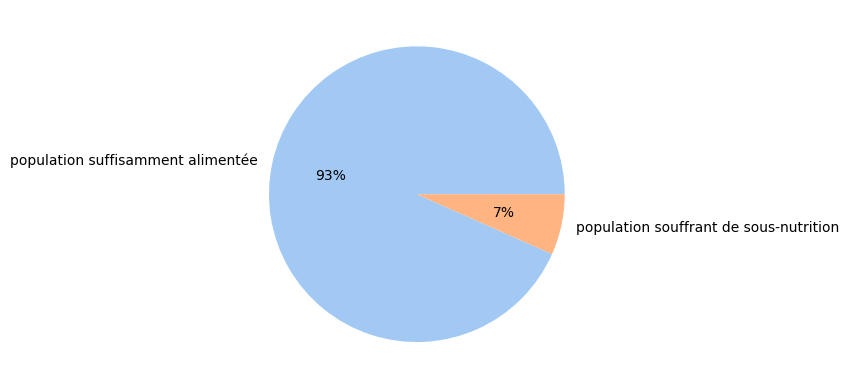

In [59]:
#déclaration des variables composant les données servant à créer le diagramme circulaire:
data = [pop_mondiale, pop_sousnut]
#définition des labels correspondant aux données du diagramme:
labels =["population suffisamment alimentée", "population souffrant de sous-nutrition"]
#choix de la coloration du diagramme:
colors = sns.color_palette("pastel")
#définition du type de graphique et de son contenu affiché:
plt.pie(data, labels = labels, colors = colors, autopct = "%0.0f%%")
#affichage du diagramme circulaire:
plt.show()

### 2.1.2 - Nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale

### 2.1.2.1 - Définition de l'AJR (Apport Journalier Recommandé) moyen (2250 kcal) et de l'AJR rammené à l'année (AJR_annuel) :

In [60]:
ajr_moyen = 2250
ajr_annuel = ajr_moyen*365

### 2.1.2.2 - Population des pays ayant une disponibilité intérieure (2017)

#### - Création du dataframe "populations_dispo" par fusion des dataframes "populations" et "dispo" avec la fonction "merge" depuis les séries "pays" et "population" .
#### - J'utilise la méthode ".loc" sur le dataframe "populations" pour sélectionner le sous-ensemble de lignes ayant la valeur "2017" dans la colonne "année".
#### - Je continue l'utilisation de la méthode ".loc" spour sélectionner les colonnes "pays" et "population" du sous-ensemble de lignes sélectionné précédemment (année==2017).
#### - J'utilise enfin la série "pays" comme clé de fusion des 2 dataframes "populations" et "dispo".

In [61]:
populations_dispo = dispo.merge(populations.loc[populations["année"]==2017, ["pays","population"]],on="pays")
populations_dispo.head()

,pays,produit,origine,aliments_animaux,autres_utilisations,calories(kcal/pers/jour),qte(g/pers/jour),lipides(g/pers/jour),proteines(g/pers/jour),dispo_inter,export*1000t,import*1000t,nourriture*1000t,pertes*1000t,production*1000t,semences*1000t,traitement*1000t,variation_stock*1000t,population
0,afghanistan,Abats Comestible,animale,0.0,0.0,5.0,4.712329,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,36296113
1,afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,3.534247,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,36296113
2,afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.164384,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,36296113
3,afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113
4,afghanistan,Bananes,vegetale,0.0,0.0,4.0,7.397260,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,36296113


### 2.1.2.3 - Calcul de la disponibilité alimentaire mondiale en calories

#### - Je crée la série "dispo_kcal" qui représente le produit du nombre de calories disponibles (par personne et par jour)  par le nombre de personnes du pays correspondant, dans le dataframe "populations_dispo" .
#### - Je crée ensuite la variable "dispo_mondiale" qui donne la somme des calories disponibles de tous les pays, ce qui représente la disponibilité alimentaire mondiale en calories pour 2017.


In [62]:
populations_dispo["dispo_kcal"] = populations_dispo["calories(kcal/pers/jour)"]*populations_dispo["population"]*365
dispo_mondiale= populations_dispo["dispo_kcal"].sum()
print("La disponibilité alimentaire mondiale est de {:,}".format(dispo_mondiale),"calories")

La disponibilité alimentaire mondiale est de 7,718,847,048,220,055.0 calories


### 2.1.2.4 - Total d'êtres humains pouvant être nourris

#### Je crée la variable "total_h_cal" qui fait la somme de la disponibilité alimentaire mondiale ("dispo_mondiale") sur l'apport annuel calorique recommandé par personne ("ajr_annuel")

In [63]:
total_h_cal = np.sum(round(populations_dispo["dispo_kcal"] / ajr_annuel))
print("total d'êtres humains pouvant être nourris :{:,}".format(total_h_cal))

total d'êtres humains pouvant être nourris :9,398,900,496.0


#### Je crée la variable "population_mondiale_2017" en sélectionnant les lignes du dataframe "populations" où la valeur de la série "année" correspond à "2017". La chaîne de caractères "population" sélectionne la colonne du même nom de ce dataframe.

In [64]:
#population mondiale en 2017
population_mondiale_2017 = populations.loc[populations["année"]==2017,"population"].sum()
print("La population mondiale en 2017 est de {:,}".format(population_mondiale_2017),"habitants")

La population mondiale en 2017 est de 7,548,134,097 habitants


### 2.1.2.5 - Proportion d'êtres humains pouvant être nourris grâce aux disponibilités alimentaires mondiales pour l'année 2017:

#### Je crée la variable "proportion" qui représentera ce ratio en divisant la disponibilité alimentaire mondiale(variable "total_h_cal") par la population mondiale de l'année 2017(variable "population_mondiale_2017"), faisant un arrondi à 2 décimales.

In [65]:
#proportion en rapport avec la population mondiale
proportion = round((total_h_cal/population_mondiale_2017)*100,2)
print("proportion de personnes pouvant être nourries :",proportion,"%")

proportion de personnes pouvant être nourries : 124.52 %


### 2.1.3 - Nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire végétale mondiale

### 2.1.3.1 - Calcul de la disponibilité alimentaire végétale mondiale

#### - Création de la série "dispo_végétale" à partir de la selection des lignes de la colonne "calories(kcal/pers/jour)", après le tri dans la colonne "origine", des lignes  ayant pour valeur "végétale" dans le dataframe "populations_dispo".
#### - Création de la variable "disp_vege" qui fait la somme des valeurs de la série "dispo_vegetale" en calories, par personne et par jour.

In [66]:
dispo_vegetale = populations_dispo.loc[populations_dispo["origine"]=="vegetale","calories(kcal/pers/jour)"]
disp_vege = dispo_vegetale.sum()
print("disponibilité alimentaire végétale mondiale en kcal/pers/jour: {:,}".format(disp_vege))

disponibilité alimentaire végétale mondiale en kcal/pers/jour: 396,364.0


#### Création de la variable "total_dispo_vegetale" à partir de la somme du produit de "dispo_vegetale" par la "population_dispo", le tout rammené à l'année en multipliant par 365, pour obtenir le total de la disponibilité végétale mondiale.

In [67]:
total_dispo_vegetale = np.sum(dispo_vegetale*populations_dispo["population"]*365)
print("total de la disponibilité végétale mondiale {:,}".format(total_dispo_vegetale), "calories")

total de la disponibilité végétale mondiale 6,359,679,474,504,460.0 calories


#### Création de la variable "total_h_végétale" , obtenue par le quotient de la variable "total_dispo_vegetale" par la variable "ajr_annuel" pour obtenir le nombre d'êtres humains pouvant être nourris grâce à la production végétale mondiale

In [68]:
total_h_vegetal = round(total_dispo_vegetale.sum()/ajr_annuel,0)
print("Nombre d'êtres humains nourrissables grâce à la production d'aliments à base vegetale : {:,}".format(total_h_vegetal),"personnes")

Nombre d'êtres humains nourrissables grâce à la production d'aliments à base vegetale : 7,743,901,948.0 personnes


#### Création de la variable  "proportion_vegetale" obtenue par le quotient de la variable "total_h_vegetal" sur "population_mondiale_2017", le tout multiplié par 100 et arrondi à 2 décimales afin de déterminer la proportion du résultat précédent au regard de la population mondiale totale.

In [69]:
#proportion en rapport avec la population mondiale
proportion_vegetale = round((total_h_vegetal/population_mondiale_2017)*100,2)
print("proportion en rapport avec la population mondiale : ",proportion_vegetale,"%")

proportion en rapport avec la population mondiale :  102.59 %


### 2.1.4 - Utilisation de la disponibilité intérieure concernant :

### 2.1.4.1 - Part attribuée à l'alimentation animale

#### Création de la variable "production_totale" en sommant la colonne "production*1000t" du dataframe "dispo" qui donnera la production totale en milliers de tonnes.

In [70]:
production_totale=dispo["production*1000t"].sum()  
print("production totale en milliers de tonnes :",production_totale)  

production totale en milliers de tonnes : 10009680.0


#### Création de la variable "qte_aliments_animaux" en sommant la colonne "aliments_animaux" du dataframe "dispo" qui donnera la quantité de nourriture destinée à l'alimentation animale, en milliers de tonnes.

In [71]:
qte_aliments_animaux = dispo["aliments_animaux"].sum()
#proportion  nourriture destinée à l'alimentation animale:
part_aliments_animaux =round((qte_aliments_animaux/production_totale)*100,2)
print("proportion  nourriture destinée à l'alimentation animale :",part_aliments_animaux,"%")

proportion  nourriture destinée à l'alimentation animale : 13.03 %


### 2.1.4.2 Part perdue

In [72]:
# production perdue en milliers de tonnes
pertes = dispo["pertes*1000t"].sum()
print("production perdue en milliers de tonnes :",pertes)

production perdue en milliers de tonnes : 453698.0


In [73]:
#proportion de la production perdue
part_pertes = round((pertes/production_totale)*100,2)
print("proportion de la production perdue :",part_pertes,"%")

proportion de la production perdue : 4.53 %


### 2.1.4.3 Part concrétement utilisée pour l'alimentation humaine

In [74]:
#production destinée à l'alimentation humaine en milliers de tonnes:
nourriture = dispo["nourriture*1000t"].sum()
print("production destinée à l'alimentation humaine en milliers de tonnes :",nourriture)

production destinée à l'alimentation humaine en milliers de tonnes : 4876258.0


In [75]:
#proportion de la part réservée à l'alimentation humaine:
part_nourriture = round((nourriture / production_totale)*100,2)
print("proportion de la part réservée à l'alimentation humaine :",part_nourriture,"%")

proportion de la part réservée à l'alimentation humaine : 48.72 %


## 2.2 demandes de Mélanie (étude affinée pour chaque pays)

### 2.2.1 Pays où la proportion des personnes sous alimentées est la plus forte en 2017

In [76]:
#population par pays en 2017:
#merge des dataframes "populations" et "sousnut", pour l'année 2017 sur les séries "pays" et "population"
populations_sousnut = sousnut.merge(populations.loc[populations["année"]==2017, ["pays","population"]],on="pays")
print(populations_sousnut)

             pays  année  population_x  population_y
0     afghanistan   2013       8600000      36296113
1     afghanistan   2014       8800000      36296113
2     afghanistan   2015       8900000      36296113
3     afghanistan   2016       9700000      36296113
4     afghanistan   2017      10500000      36296113
...           ...    ...           ...           ...
1195     zimbabwe   2014             0      14236595
1196     zimbabwe   2015             0      14236595
1197     zimbabwe   2016             0      14236595
1198     zimbabwe   2017             0      14236595
1199     zimbabwe   2018             0      14236595

[1200 rows x 4 columns]


#### Renommage des séries "population_x" et "population_y" issues de la fusion des dataframes

In [77]:
#renommage des séries "population_x" et "population_y"

populations_sousnut.rename(
    columns = {
        "population_x":"population_sousnut",
        "population_y":"population_totale"
        },
    inplace = True
)

#verification : 
populations_sousnut.columns

Index(['pays', 'année', 'population_sousnut', 'population_totale'], dtype='object')

### Calcul de la proportion de la population en sous-nutrition :

#### Création de la fonction "calcul_proportion" qui retournera le quotient de "x" sur "y".

In [78]:
def calcul_proportion (x,y):
    return x/y

#### Création de la série "proportions" dans le dataframe "populations_sousnut", qui sera issue de l'application de la fonction "calcul_proportion" 
#### la fonction "lambda" applique, ligne par ligne, l'arrondi du résultat  du quotient obtenu par l'exécution de la fonction "calcul_proportion" ( "population_sousnut"/"population_totale"). 
#### L'application de la valeur 1 à axis détermine l'application de la fonction à chaque ligne.

In [79]:
#calcul de la population sous-alimentée par pays 
def calcul_proportion (x,y):
    return x/y

populations_sousnut["proportions"] = populations_sousnut.apply(lambda row:
round( calcul_proportion(row["population_sousnut"],row["population_totale"])*100,2), axis=1) 

print(populations_sousnut)

             pays  année  population_sousnut  population_totale  proportions
0     afghanistan   2013             8600000           36296113        23.69
1     afghanistan   2014             8800000           36296113        24.25
2     afghanistan   2015             8900000           36296113        24.52
3     afghanistan   2016             9700000           36296113        26.72
4     afghanistan   2017            10500000           36296113        28.93
...           ...    ...                 ...                ...          ...
1195     zimbabwe   2014                   0           14236595         0.00
1196     zimbabwe   2015                   0           14236595         0.00
1197     zimbabwe   2016                   0           14236595         0.00
1198     zimbabwe   2017                   0           14236595         0.00
1199     zimbabwe   2018                   0           14236595         0.00

[1200 rows x 5 columns]


In [80]:
pd.set_option("display.max_rows",20)

#### création du dataframe "resultat" pour ne garder que les données concernant 2017, avec affichage des séries "pays" et "proportions"

In [81]:
resultat=populations_sousnut.loc[(populations_sousnut["année"]==2017),["pays","proportions"]].copy()

#### regroupement, dans la variable "valeurs_nulles" des valeurs égales à zéro 

In [82]:
valeurs_nulles= resultat[resultat["proportions"]==0.00].index

#### suppression des valeurs égales à zéro dans la série "proportions"

In [83]:
resultat.drop(valeurs_nulles, inplace=True)

#### affichage des résultats de manière décroissante

In [84]:
print(resultat.sort_values(by=["proportions"], ascending=False))

                                pays  proportions
310                        dominique        69.97
472                            haïti        48.26
934                    corée du nord        47.19
976  saint vincent et les grenadines        45.53
586                         kiribati        43.80
..                               ...          ...
22                           algérie         3.14
802                      ouzbékistan         2.82
178                         bulgarie         2.82
640                macédoine du nord         2.40
64                           arménie         1.70

[102 rows x 2 columns]


### 2.2.2 Pays ayant le plus bénéficié d'aides depuis 2013 (en milliers de tonnes)

#### Création du dataframe "aide" qui regroupera les sommes de la série "tonnes" du dataframe "aides", par pays

In [85]:
aide=aides.groupby("pays").sum()[["tonnes"]].copy()
print(aide.sort_values(by=["tonnes"], ascending=False))

                tonnes
pays                  
syrie          1858943
éthiopie       1381294
yémen          1206484
soudan du sud   695248
soudan          669784
...                ...
égypte            1122
vanuatu            802
timor leste        116
géorgie             70
bolivie              6

[76 rows x 1 columns]


### 2.2.3 Pays ayant le plus / moins de disponibilité par habitant

### 2.2.3.1 en kcal/personnes/jour

#### Création du dataframe "dispo_pays_cal" qui regroupe, par pays, la somme de la disponibilité alimentaire des produits par habitant

In [86]:
#pays en disposant le plus
dispo_pays_cal = dispo[["pays","produit","calories(kcal/pers/jour)"]].groupby("pays").sum()
dispo_pays_cal.sort_values(by="calories(kcal/pers/jour)", ascending=False).head(10)

,calories(kcal/pers/jour)
pays,
autriche,3770.0
belgique,3737.0
turquie,3708.0
états unis d'amérique,3682.0
israël,3610.0
irlande,3602.0
italie,3578.0
luxembourg,3540.0
égypte,3518.0


In [87]:
#pays en disposant le moins
dispo_pays_cal = dispo[["pays","produit","calories(kcal/pers/jour)"]].groupby("pays").sum()
dispo_pays_cal.sort_values(by="calories(kcal/pers/jour)").head(10)

,calories(kcal/pers/jour)
pays,
république centrafricaine,1879.0
zambie,1924.0
madagascar,2056.0
afghanistan,2087.0
haïti,2089.0
corée du nord,2093.0
tchad,2109.0
zimbabwe,2113.0
ouganda,2126.0


#### 2.2.3.2 en g/pers/jour

In [88]:
#pays en disposant le plus
dispo_pays_qte = round(dispo[["pays","produit","qte(g/pers/jour)"]].groupby("pays").sum(),2)
dispo_pays_qte.sort_values(by="qte(g/pers/jour)", ascending=False).head(10)

,qte(g/pers/jour)
pays,
monténégro,3316.19
luxembourg,3152.49
irlande,3151.10
albanie,3001.48
finlande,2996.63
grèce,2933.97
pays bas,2929.37
autriche,2929.32
lituanie,2876.90


In [89]:
#pays en disposant le moins
dispo_pays_qte = round(dispo[["pays","produit","qte(g/pers/jour)"]].groupby("pays").sum(),2)
dispo_pays_qte.sort_values(by="qte(g/pers/jour)").head(10)

,qte(g/pers/jour)
pays,
tchad,875.21
zimbabwe,922.16
zambie,959.23
afghanistan,962.77
éthiopie,971.37
guinée bissau,982.14
bangladesh,998.74
timor leste,1011.23
yémen,1028.52


#### 2.2.3.3 en lipides (g/pers/jour)

In [90]:
#pays en disposant le plus
dispo_pays_lip = dispo[["pays","produit","lipides(g/pers/jour)"]].groupby("pays").sum()
dispo_pays_lip.sort_values(by="lipides(g/pers/jour)",ascending=False).head(10)

,lipides(g/pers/jour)
pays,
autriche,170.44
belgique,161.95
états unis d'amérique,161.37
france,159.15
italie,154.69
suisse,153.35
israël,151.39
islande,151.35
australie,150.81


In [91]:
#pays en disposant le moins
dispo_pays_lip = dispo[["pays","produit","lipides(g/pers/jour)"]].groupby("pays").sum()
dispo_pays_lip.sort_values(by="lipides(g/pers/jour)").head(10)

,lipides(g/pers/jour)
pays,
rwanda,23.77
madagascar,24.49
éthiopie,25.89
bangladesh,29.92
lesotho,32.26
afghanistan,33.50
cambodge,35.93
corée du nord,36.41
laos,38.86


#### 2.2.3.4 en proteines (g/pers/jour)

In [92]:
#pays en disposant le plus
dispo_pays_prot = dispo[["pays","produit","proteines(g/pers/jour)"]].groupby("pays").sum()
dispo_pays_prot.sort_values(by="proteines(g/pers/jour)",ascending=False).head(10)

,proteines(g/pers/jour)
pays,
islande,133.06
chine_hong-kong,129.07
israël,128.00
lituanie,124.36
maldives,122.32
finlande,117.56
luxembourg,113.64
monténégro,111.90
pays bas,111.46


In [93]:
#pays en disposant le moins
dispo_pays_prot = dispo[["pays","produit","proteines(g/pers/jour)"]].groupby("pays").sum()
dispo_pays_prot.sort_values(by="proteines(g/pers/jour)").head(10)

,proteines(g/pers/jour)
pays,
libéria,37.66
guinée bissau,44.05
mozambique,45.68
république centrafricaine,46.04
madagascar,46.69
haïti,47.70
zimbabwe,48.32
congo,51.41
ouganda,52.64


### 2.3 demandes de Julien

### 2.3.1 répartition entre l'alimentation humaine et animale

#### Création d'une liste reprenant les produits alimentaires céréaliers présents dans la base de données de la F.A.O

In [94]:
liste_cereales = ["Blé","Riz (Eq Blanchi)","Orge", "Maïs","Seigle","avoine","Millet", "Sorgho", "Céréales, Autres","Sésame"]

#### création du dataframe "cereales" ne contenant que les informations des céréales présents dans la liste "liste_cereales"

In [95]:
cereales = dispo.loc[dispo["produit"].isin(liste_cereales),:]

#### Création de la variable "resultat_animal" qui , par l'arrondi du quotient des sommes des aliments pour animaux sur la diponibilité intérieurs, donnera la proportion que représente la production d'aliments destinés aux animaux

In [96]:
resultat_animal =round(cereales["aliments_animaux"].sum()/cereales["dispo_inter"].sum()*100,2)
print("proportion d'alimentation animale:",resultat_animal,"%")

proportion d'alimentation animale: 35.9 %


#### Procédé identique que le précédent, pour l'alimentation humaine, cette fois-ci

In [97]:
resultat_nourriture = round(cereales["nourriture*1000t"].sum()*100/cereales["dispo_inter"].sum(),2)
print("proportion d'alimentation humaine:",resultat_nourriture,"%")

proportion d'alimentation humaine: 42.99 %


### 2.3.2 manioc Thaïlande

### 2.3.2.1 proportion de la population souffrant de sous-nutrition en thaïlande pour l'année 2018 :

In [98]:
#sélection de la thaïlande dans le dataframe "sousnut"
thai_sounut = sousnut.loc[sousnut["pays"] == "thaïlande",:]

#sélection de la thaïlande dans le dataframe "populations"
thai_pop = populations.loc[populations["pays"]  == "thaïlande",:]

#calcul de la proportion de sous-nutrition / population, arrondi à 2 décimales.
#sélection de la ligne ayant l'indice 5 (correspondant à 2018) sur les df "thai_sounut" et "thai_pop"
resultat_thai_sounut = round(thai_sounut["population"].iloc[5]*100 / thai_pop["population"].iloc[5],2)
print ("proportion de la population en état de sous-nutrition en Thaïlande :", resultat_thai_sounut , "%")

proportion de la population en état de sous-nutrition en Thaïlande : 9.36 %


### 2.3.2.2 proportion de manioc exporté

In [99]:
thai_manioc = dispo.loc[(dispo["produit"]== "Manioc")&(dispo["pays"]=="thaïlande"),["export*1000t","production*1000t"]].copy()
thai_manioc["proportion_export"] = round((thai_manioc["export*1000t"])*100/(thai_manioc["production*1000t"]),2)
resultat_thai_manioc=thai_manioc["proportion_export"].sum()
print("proportion de manioc exporté : ", resultat_thai_manioc , "%")

proportion de manioc exporté :  83.41 %


### On peut remarquer qu'une très grosse proportion de la production de manioc est exportée, alors que près de 10% de la population Thaïlandaise souffre de sous-nutrition.

### 2.3.3 lien logique entre les 10 variables

#### Equation à 3 termes de type (A1+A2+[...]= B1+B2+[...]= C1+C2+[...]) faisant intervenir chacune des quantités données.

### 2.3.3.1 création d'un dataframe "france_ble" pour vérification des données:

In [100]:
france_ble = dispo[(dispo["pays"] == "france") & (dispo["produit"] == "Blé")].sum()
france_ble

pays                            france
produit                            Blé
origine                       vegetale
aliments_animaux                7822.0
autres_utilisations             2824.0
calories(kcal/pers/jour)         811.0
qte(g/pers/jour)            297.068493
lipides(g/pers/jour)               4.2
proteines(g/pers/jour)           25.99
dispo_inter                    20298.0
export*1000t                   21502.0
import*1000t                    2055.0
nourriture*1000t                6971.0
pertes*1000t                     358.0
production*1000t               38614.0
semences*1000t                   748.0
traitement*1000t                1575.0
variation_stock*1000t           1131.0
dtype: object

### 2.3.3.2 premier terme de l'équation : disponibilté intérieure

In [101]:
dispo_interieure1 = france_ble["dispo_inter"].sum()
print("disponibilité intérieure en milliers de tonnes.v1 :", dispo_interieure1)

disponibilité intérieure en milliers de tonnes.v1 : 20298.0


### 2.3.3.3 second terme de l'équation

In [102]:
dispo_interieure2 = (int(france_ble["production*1000t"])
                     + int(france_ble["import*1000t"])
                     - int(france_ble["export*1000t"])
                     + int(france_ble["variation_stock*1000t"]))

print("disponibilité intérieure en milliers de tonnes.v2 :", dispo_interieure2)

disponibilité intérieure en milliers de tonnes.v2 : 20298


### 2.3.3.4 troisieme terme de l'équation 

In [103]:
dispo_interieure3 = (int(france_ble["nourriture*1000t"])
                     + int(france_ble["aliments_animaux"])
                     + int(france_ble["semences*1000t"])
                     + int(france_ble["traitement*1000t"])
                     + int(france_ble["autres_utilisations"])
                     + int(france_ble["pertes*1000t"]))

print("disponibilité intérieure en milliers de tonnes.v3 :", dispo_interieure3)


disponibilité intérieure en milliers de tonnes.v3 : 20298
